In [1]:
import os
root = os.path.join('..', '..')

In [2]:
import sys
sys.path.append(root)

In [3]:
from typing import Literal

import torch
from torchvision.transforms import ToTensor

from utils.datasets import CIFAR10, FMNIST, MNIST
from utils.fig import Figure

In [4]:
Figure.set_tex()
Figure.set_high_dpi()
dataset_root = os.path.join(os.path.sep, 'root', 'datasets')

In [5]:
def show(dataset_name: Literal['MNIST', 'FMNIST', 'CIFAR10']) -> None:
    Figure.set_font_scale(0.35)

    row = 10
    col = 9
    f = Figure(row, col, (2.9, 3.9))

    imgs, labels = [], []

    if dataset_name == 'MNIST':
        dataset = MNIST(dataset_root, True)
    elif dataset_name == 'FMNIST':
        dataset = FMNIST(dataset_root, True)
    elif dataset_name == 'CIFAR10':
        dataset = CIFAR10(dataset_root, True, ToTensor())
    else:
        raise ValueError(dataset_name)

    for c in range(col):
        img, label = dataset[c]

        if dataset_name == 'MNIST':
            img = img[0]
        elif dataset_name == 'FMNIST':
            img = img[0]
            label = FMNIST.classes[label]
        elif dataset_name == 'CIFAR10':
            img = img.permute(1, 2, 0)
            label = CIFAR10.classes[label]

        imgs.append(img)
        labels.append(label)

    f.axes[0][0].set_ylabel('Natural')

    dnames = (
        'natural_rand_L0', 
        'natural_det_L0', 
        'natural_rand_L2', 
        'natural_det_L2', 
        'natural_rand_Linf', 
        'natural_det_Linf', 
        'uniform_L0',
        'uniform_L2', 
        'uniform_Linf', 
    )

    ylabels = (
        r'$L_0$' + ' (R)',
        r'$L_0$' + ' (D)',
        r'$L_2$' + ' (R)',
        r'$L_2$' + ' (D)',
        r'$L_\infty$' + ' (R)',
        r'$L_\infty$' + ' (D)',
        r'$L_0$',
        r'$L_2$',
        r'$L_\infty$',
    )

    for i, (dname, ylabel) in enumerate(zip(dnames, ylabels)):
        dataset_path = os.path.join(root, 'datasets', dataset_name + '_' + dname, 'dataset')
        dataset = torch.load(dataset_path, map_location='cpu')

        perturbed_imgs = dataset['imgs'][:9]
        target_labels = dataset['labels'][:9]

        if dataset_name == 'MNIST':
            perturbed_imgs = [img[0] for img in perturbed_imgs]
            target_labels = [label.item() for label in target_labels]

        elif dataset_name == 'FMNIST':
            perturbed_imgs = [img[0] for img in perturbed_imgs]
            target_labels = [FMNIST.classes[label.item()] for label in target_labels]

        elif dataset_name == 'CIFAR10':
            perturbed_imgs = [img.permute(1, 2, 0) for img in perturbed_imgs]
            target_labels = [CIFAR10.classes[label.item()] for label in target_labels]

        imgs.extend(perturbed_imgs)
        labels.extend(target_labels)

        f.axes[i+1][0].set_ylabel(ylabel)

    for ax, img, label in zip(f.generate(), imgs, labels):
        ax.imshow(img, gray=dataset_name!='CIFAR10')
        ax.set_xlabel(label, labelpad=1)
        ax.move_xlabel(0, -1000)
        ax.set_spines_linewidth(0.5)

    f.set_axes_space(0.005, 0.0)

    f.save(root, 'figs', f'practical_imgs_{dataset_name}.pdf')
    f.show()
    f.close()

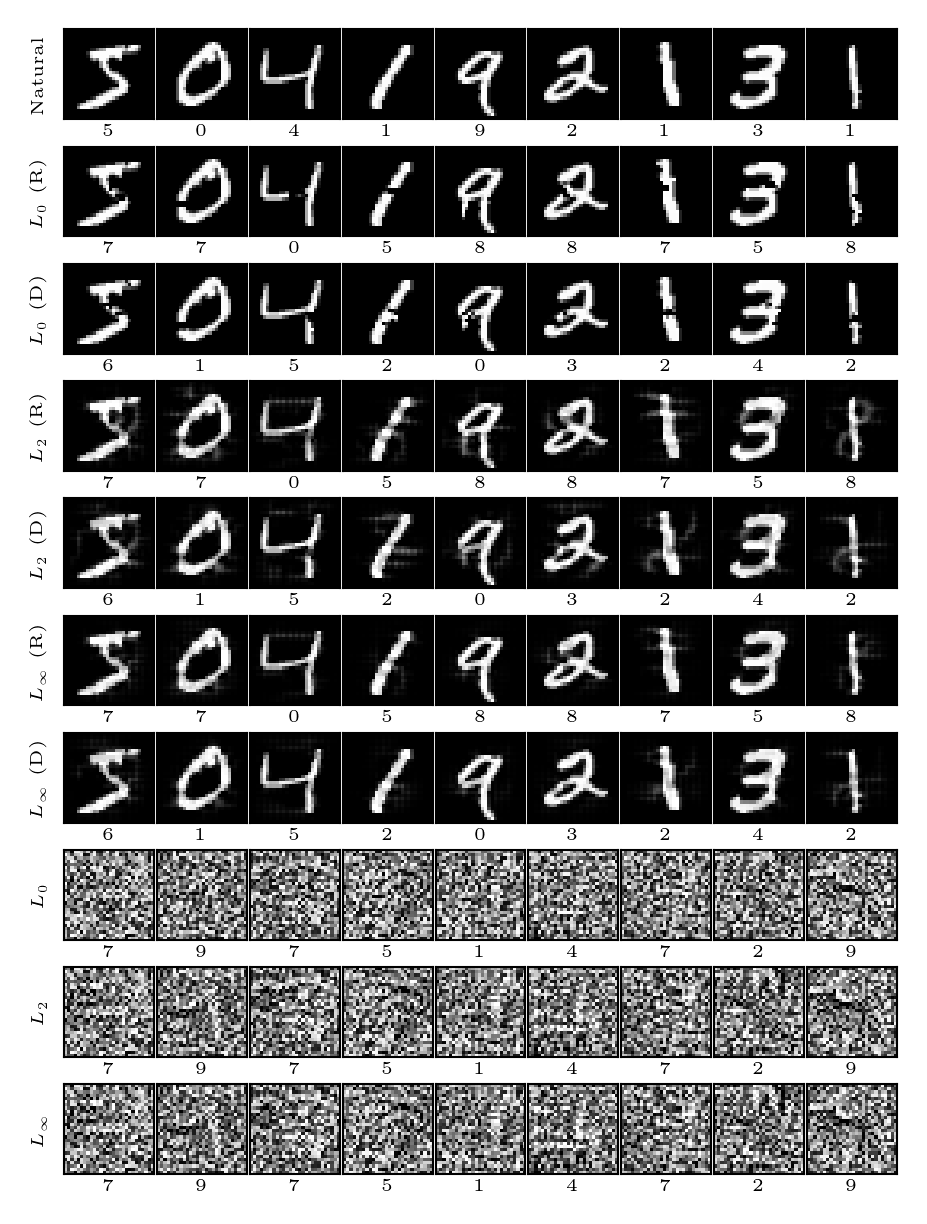

In [6]:
show('MNIST')

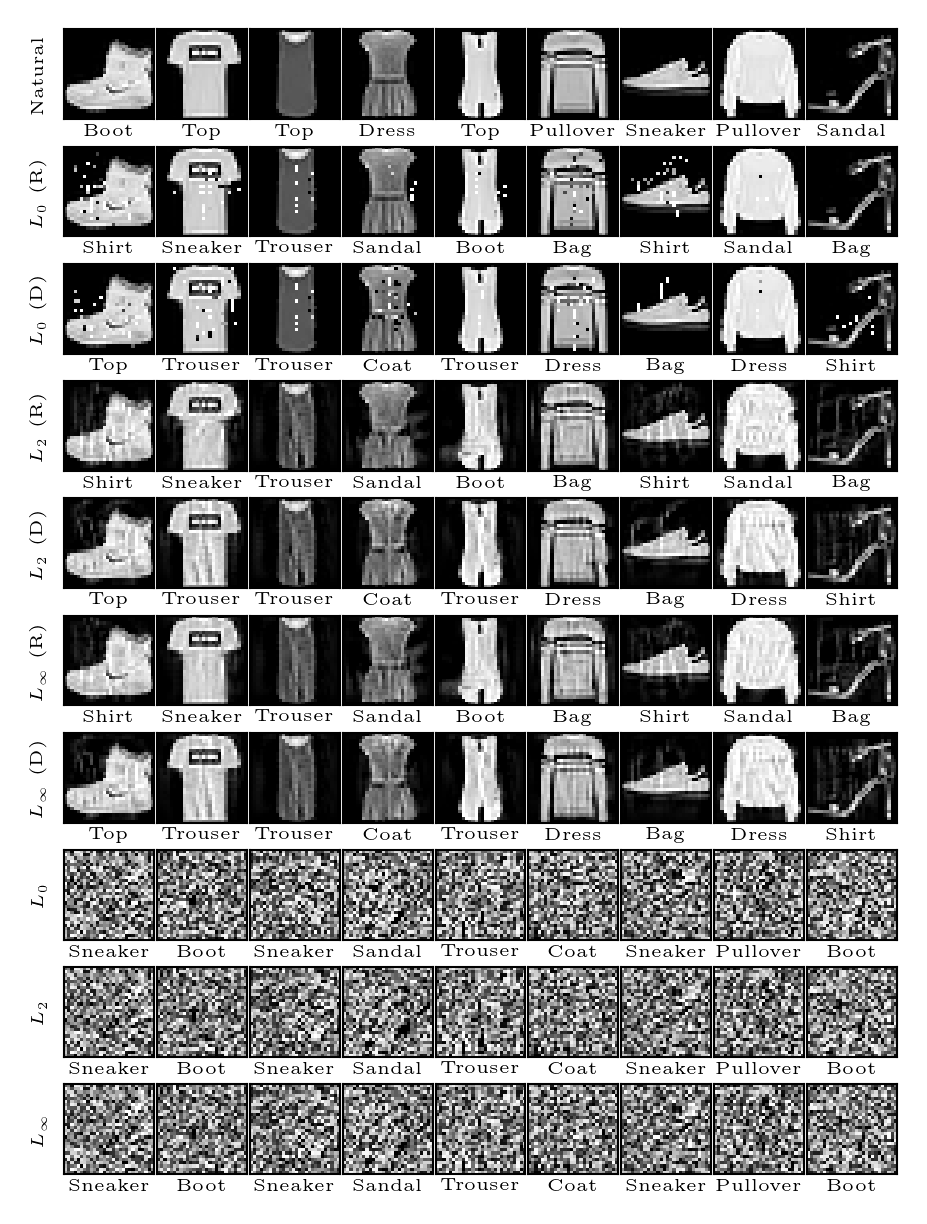

In [7]:
show('FMNIST')

Files already downloaded and verified


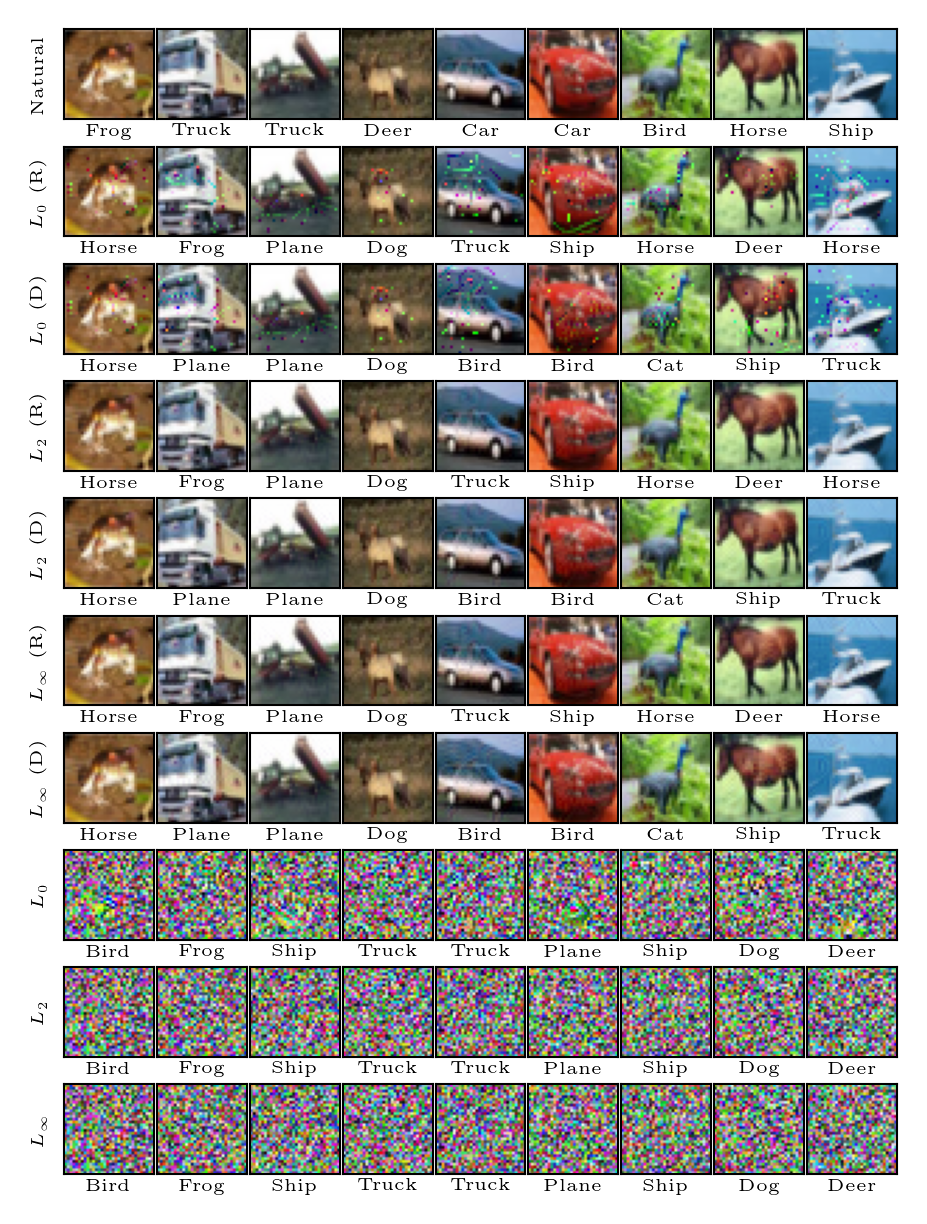

In [8]:
show('CIFAR10')